# <center>Machine Learning</center>

## Classification MNIST à l'aide d'un réseau de neurones convolutif
### Clément AUBEUF

----

<a
  target="_blank" href="https://colab.research.google.com/drive/1WhJ4uHbDqtEH9PqTzPQlxtCUcw5B-JJZ">
  <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />
  Ouvrir dans Google Colab
</a>

----

### Importation des bibliothèques

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.DT909M_3.0.1/fashion_mnist-train.tfrecord*...:   …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.DT909M_3.0.1/fashion_mnist-test.tfrecord*...:   0…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.
Nombre d'exemples pour l'entrainement : 60000
Nombre d'exemples pour le test final : 10000


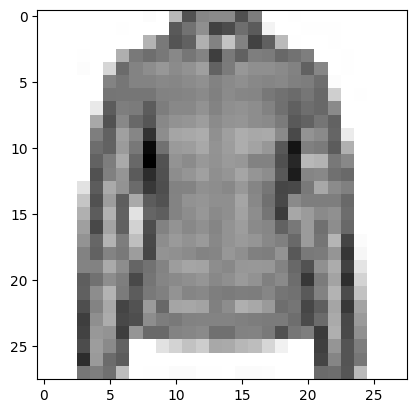

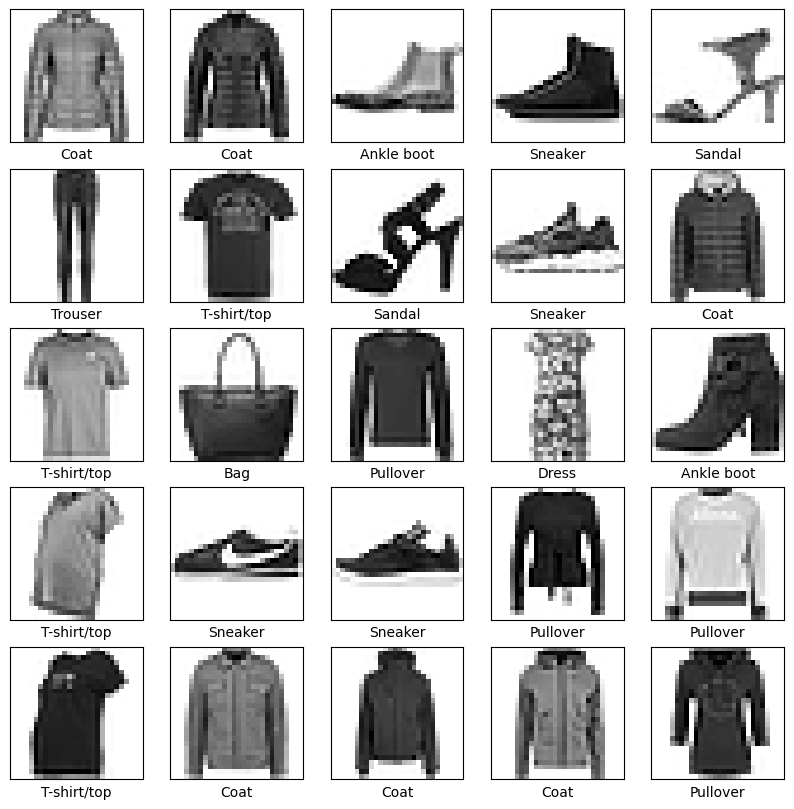

Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 104s 51ms/step - accuracy: 0.8023 - loss: 0.5558
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 93s 50ms/step - accuracy: 0.9002 - loss: 0.2726
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 93s 50ms/step - accuracy: 0.9203 - loss: 0.2202
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9040 - loss: 0.2464
Précision du modèle : 91 %
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


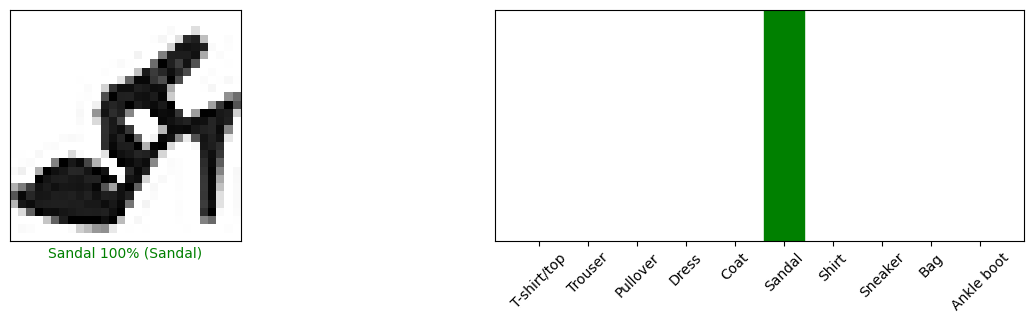

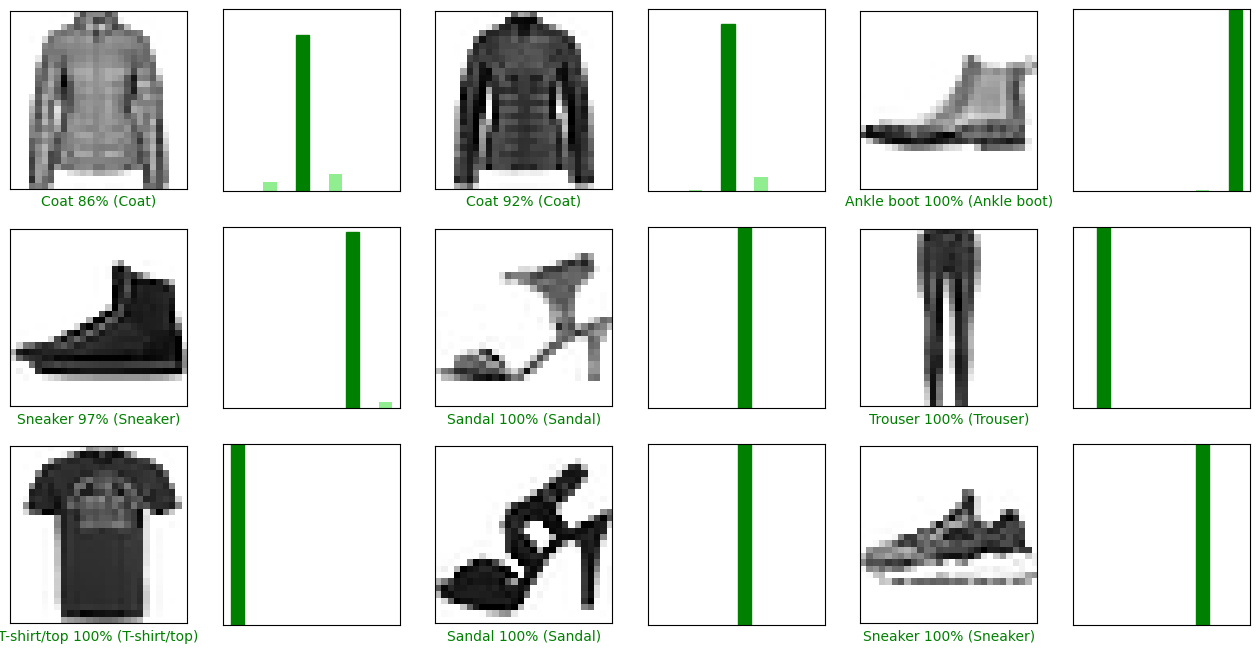

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import math
import numpy as np
import matplotlib.pyplot as plt

dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

class_names = metadata.features['label'].names
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples

print("Nombre d'exemples pour l'entrainement : {}".format(num_train_examples))
print("Nombre d'exemples pour le test final : {}".format(num_test_examples))

def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)
train_dataset =  train_dataset.cache()
test_dataset  =  test_dataset.cache()

for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.grid(False)
plt.show()

plt.figure(figsize=(10,10))

for i, (image, label) in enumerate(test_dataset.take(25)):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])

plt.show()

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu, input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

lots_img = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(lots_img)
test_dataset = test_dataset.cache().batch(lots_img)
model.fit(train_dataset, epochs=3, steps_per_epoch=math.ceil(num_train_examples/lots_img))

test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/50))
print('Précision du modèle :', int(round(test_accuracy, 2)*100),'%')

for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img[...,0], cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)

  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="lightgreen")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')

i = 7
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

nbr_lignes = 3
nbr_col = 3
nbr_imgs = nbr_lignes * nbr_col
plt.figure(figsize=(16, 8))
for i in range(nbr_imgs):
  plt.subplot(nbr_lignes, 2*nbr_col, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(nbr_lignes, 2*nbr_col, 2*i+2)
  plot_value_array(i, predictions, test_labels)
